In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
## Helper Function

def RemoveOutliers(df, sigma=3, unique=10):
    for col in df.columns:
      if df[col].nunique() > unique:
        df = df[(df[col] > (df[col].mean() - df[col].std()*sigma )) & (df[col] < (df[col].mean() + df[col].std()*sigma ))]
    return df

In [4]:
df = pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace=True)

Initial Impressions of the Dataset:
1. 283726 rows and 31 columns
2. Columns are not labelled
3. No null values

### Data Visualization

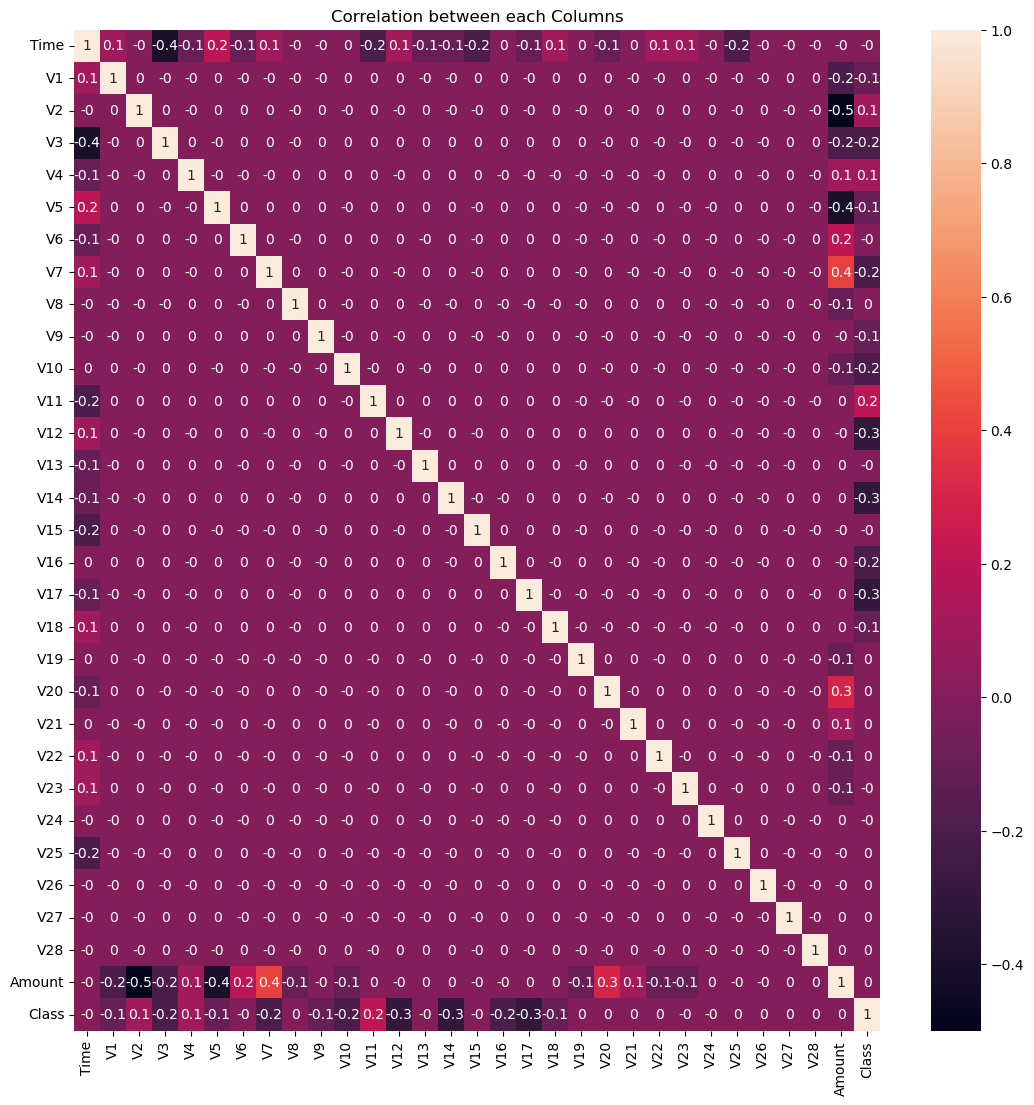

In [13]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr().round(1), annot=True) # make the plot with all values rounded up to 1 decimal places and also all the values will be shown in each cell of the matrix
plt.title('Correlation between each Columns') # title for the plot
plt.show()

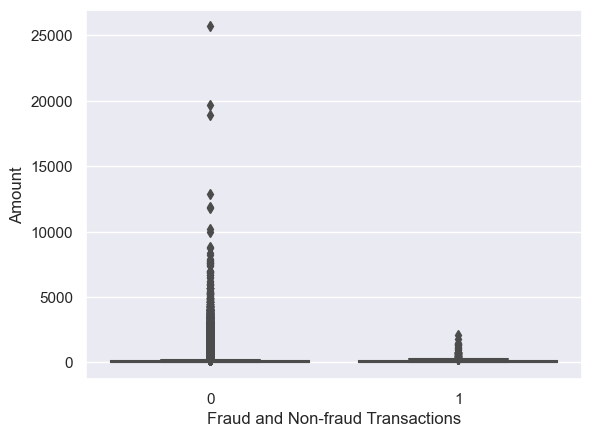

In [15]:
sns.set(style='darkgrid')
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Fraud and Non-fraud Transactions')
plt.ylabel('Amount')
plt.show()

<Axes: >

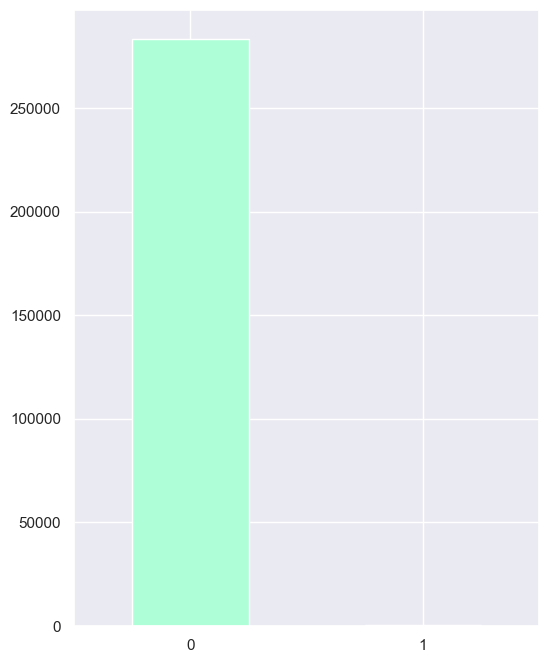

In [16]:
color = ['#AEFFD8', '#8AFFC1']
df['Class'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0)

### Pre-Processing the Data

#### Removing Outliers

In [26]:
df = RemoveOutliers(df, 3)

#### Scaling the Data

In [27]:
scaled = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)

#### Fixing Imbalanced Data with Under Sampling

In [28]:
col = [c for c in df.columns.to_list() if c not in ['Class']]
X = df[col]
Y = df['Class']

In [29]:
RUS = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_samp,Y_samp = RUS.fit_resample(X,Y)

In [30]:
X_samp = pd.DataFrame(X_samp, columns=col)
Y_samp = pd.DataFrame(Y_samp, columns=['Class'])

In [31]:
df = pd.concat([X_samp, Y_samp], axis=1)

#### Data after Under Sampling

<Axes: >

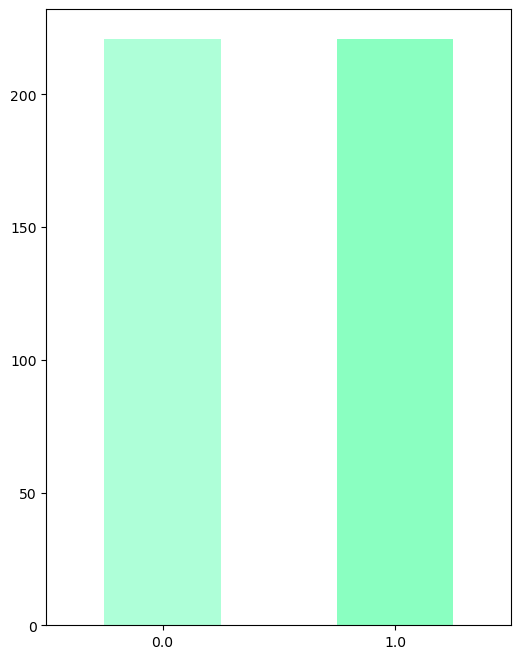

In [32]:
color = ['#AEFFD8', '#8AFFC1']
df['Class'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0)

### Training the Model

In [33]:
X = df[col]
Y = df['Class']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.40, random_state=42, stratify=df['Class'])

In [35]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

### Evaluating the Model

In [36]:
accuracy = accuracy_score(Y_test, RFC.predict(X_test))
precision = precision_score(Y_test, RFC.predict(X_test))
recall = recall_score(Y_test, RFC.predict(X_test))
f1 = f1_score(Y_test, RFC.predict(X_test))
conf_matrix = confusion_matrix(Y_test, RFC.predict(X_test))

In [37]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9285714285714286
Precision: 0.9523809523809523
Recall: 0.9022556390977443
F1-score: 0.9266409266409266
Confusion Matrix:
 [[127   6]
 [ 13 120]]
